In [21]:
from astropy.coordinates import SkyCoord
m16 = SkyCoord.from_name("M16")
print(f"Objet SkyCoords : {m16}")

Objet SkyCoords : <SkyCoord (ICRS): (ra, dec) in deg
    (274.688, -13.792)>


In [22]:
print(f" - Position RA/DEC (hms & dms / ep=J2000): {m16.to_string('hmsdms')}")
print(f" - Position RA et DEC - Détail (ep=J2000) : {m16.ra.hms, m16.dec.dms}")
print(f" - RA (min) : {m16.ra.hms.m}")

 - Position RA/DEC (hms & dms / ep=J2000): 18h18m45.12s -13d47m31.2s
 - Position RA et DEC - Détail (ep=J2000) : (hms_tuple(h=18.0, m=18.0, s=45.120000000003984), dms_tuple(d=-13.0, m=-47.0, s=-31.199999999999335))
 - RA (min) : 18.0


In [23]:
from astropy import units as u
c = SkyCoord(274.688,  -13.792, frame='icrs', unit='deg')
c = SkyCoord('18h18m45.12s', '-13d47m31.2s', frame='icrs')
c = SkyCoord('18 18 45.12 -13 47 31.2', unit=(u.hourangle, u.deg))
c 


<SkyCoord (ICRS): (ra, dec) in deg
    (274.688, -13.792)>

In [24]:
#import module
from astroquery.simbad import Simbad

#get a simbad instance
simbad = Simbad()

#add spectral type parameters for VOTable request
simbad.add_votable_fields('sptype')

#request
result_table = simbad.query_object("M16")
result_table.pprint(show_unit=True)

#Coordinates
print("\nCoordinates")
print(result_table['RA'][0])
print(result_table['DEC'][0])

#Spectral Type
print("\nSpectral Type")
print(result_table['SP_TYPE'])

MAIN_ID    RA      DEC    RA_PREC ... SP_QUAL SP_BIBCODE SCRIPT_NUMBER_ID
        "h:m:s"  "d:m:s"          ...                                    
------- -------- -------- ------- ... ------- ---------- ----------------
  M  16 18 18 45 -13 47.5       4 ...                                   1

Coordinates
18 18 45
-13 47.5

Spectral Type
SP_TYPE
-------
       


In [25]:
from astropy.io import fits

image_path = 'C:/Users/jfont/OneDrive/Desktop/M16.fits'
hdu_list = fits.open(image_path)
hdu_list.info()

Filename: C:/Users/jfont/OneDrive/Desktop/M16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (740, 478)   float32   


In [44]:
#get image_data, header and print header
hdu = hdu_list[0]
image_data = hdu_list[0].data
image_header = hdu_list[0].header

In [45]:
print(f'Image Data Type : {type(image_data)} - Shape : {image_data.shape}\n')
print('------------------------------ Header ------------------------------')
print(repr(image_header))
print('---------------------------- End Header ----------------------------')

Image Data Type : <class 'numpy.ndarray'> - Shape : (478, 740)

------------------------------ Header ------------------------------
SIMPLE  =                    T / Fits Standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  740 / Axis Length                                    
NAXIS2  =                  478 / Axis Length                                    
WCSAXES =                    2 / Number of WCS axes                             
CRPIX1  =           247.245472 / Reference pixel on axis 1                      
CRPIX2  =           118.081824 / Reference pixel on axis 2                      
CRVAL1  =  -13.816390682903998 / Value at ref. pixel on axis 1                  
CRVAL2  =   274.71152299481992 / Value at ref. pixel on axis 2                  
CTYPE1  = 'DEC--TAN'           / Type of co-ordinate on a

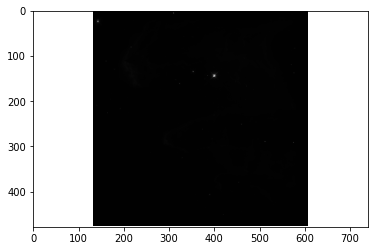

In [28]:
#Init figure
import matplotlib.pyplot as plt
import numpy as np
f1 = plt.figure()
f1.add_subplot()

#Show raw image - Parameters dataset-image & colorMap
plt.imshow(image_data, cmap='gray')
plt.show()

In [29]:
print('----- Statistics values -----')
print('Min :', np.nanmin(image_data))
print('Max :', np.nanmax(image_data))
print('Mean :', np.nanmean(image_data))
print('Stdev :', np.nanstd(image_data))
print('Data Type :', image_data.dtype) #i.e. <f4 = little-endian single-precision floating point 32 bit 
#(More detail about stype at https://numpy.org/doc/stable/reference/arrays.dtypes.html)
print('Image length : ', len(image_data)) # size list
print('Shape :', image_data.shape) # dimensions of the array

----- Statistics values -----
Min : -12.376602
Max : 3066.1184
Mean : 8.451924
Stdev : 27.624773
Data Type : >f4
Image length :  478
Shape : (478, 740)


C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


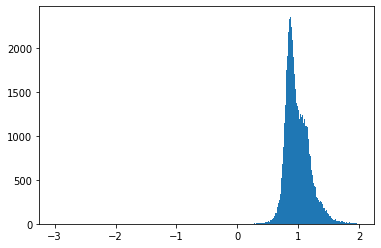

In [30]:
np.seterr(divide='ignore') #suppress the warnings raised by taking log10 of data with zeros

#New figure
f2 = plt.figure()

#Prepare Histogram
#Because image is a 2D Tab, need to convert in 1-D for plotting
#Use flatten () method on an array return 1-D numpy tab.
plt.hist(np.log10(image_data.flatten()), range=(-3, 2), bins=1000);

#Show Histogram
plt.show()

C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


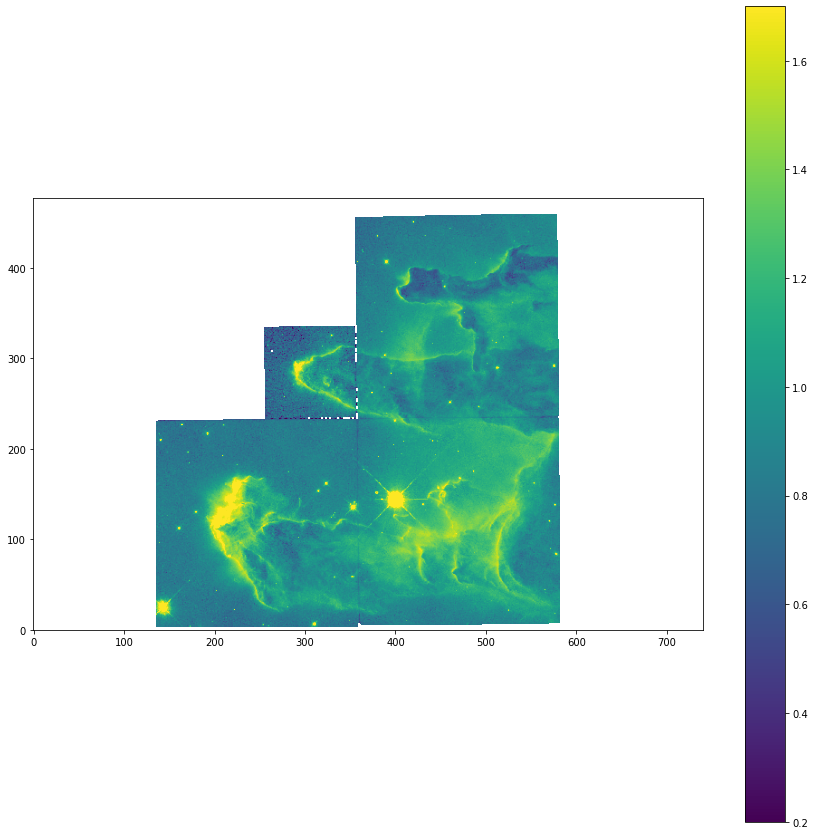

In [39]:
#hide warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from matplotlib.colors import LogNorm

f4 = plt.figure()
f4.set_figheight(15)
f4.set_figwidth(15)
plt.imshow(np.log10(image_data), cmap='viridis', vmin=.2, vmax=1.7, origin='lower')
plt.colorbar()




0.8690704


C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


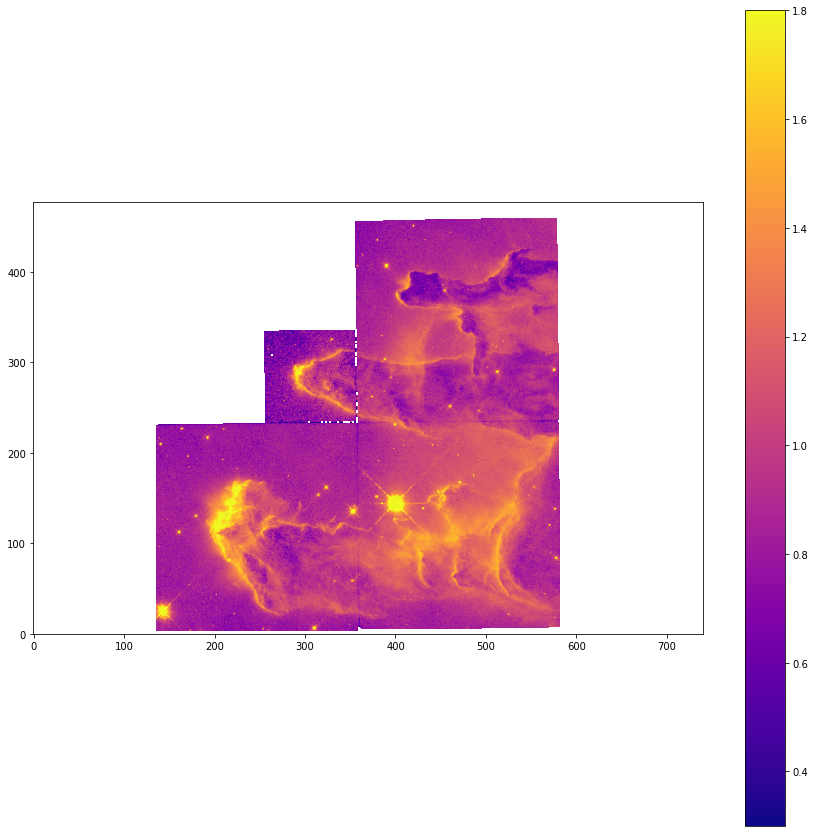

In [37]:
f5 = plt.figure()
print (np.nanmedian(np.log10((image_data))))
f5.set_figheight(15)
f5.set_figwidth(15)
plt.imshow(np.log10(image_data), cmap='plasma', vmin=.3, vmax=1.8, origin='lower')
plt.colorbar()

C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


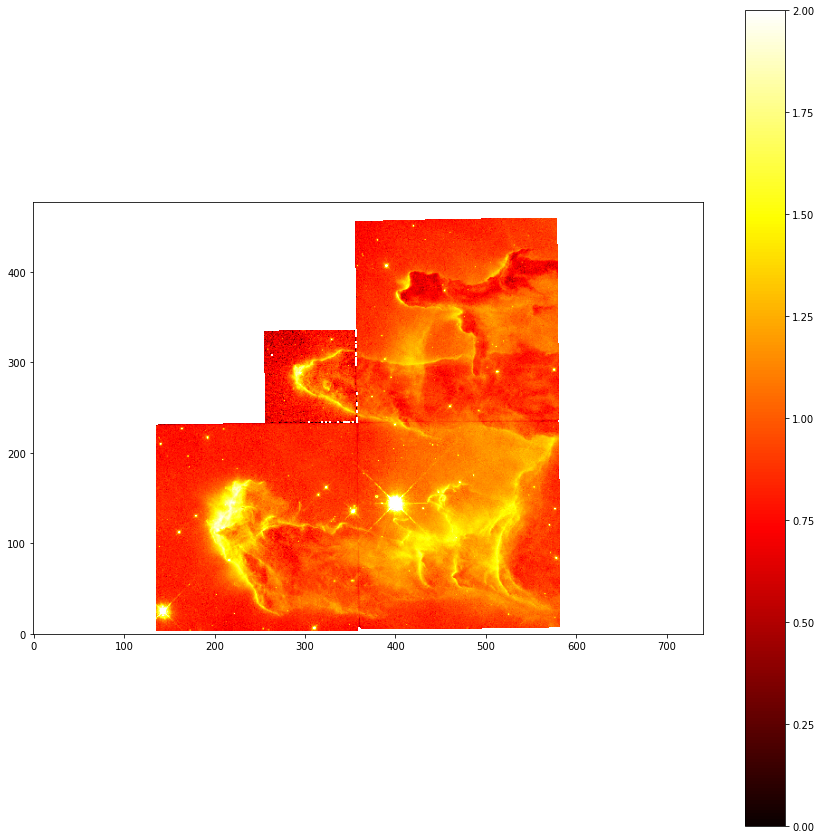

In [33]:
f6 = plt.figure()
f6.set_figheight(15)
f6.set_figwidth(15)
plt.imshow(np.log10(image_data), cmap='hot', vmin=0, vmax=2, origin='lower')
plt.colorbar()

C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


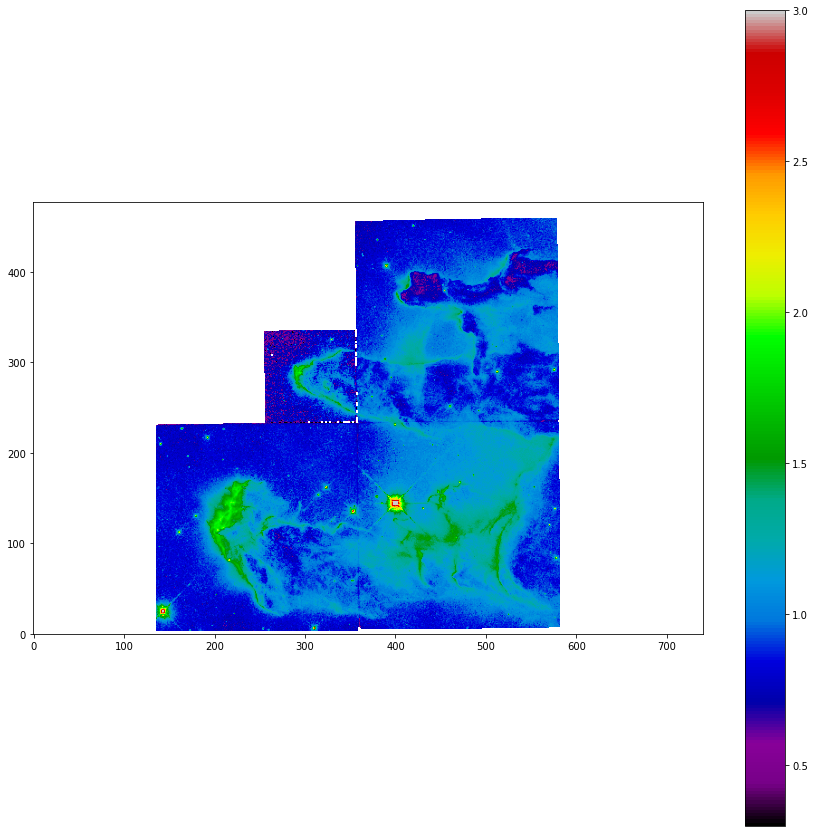

In [40]:

f7 = plt.figure()
f7.set_figheight(15)
f7.set_figwidth(15)
plt.imshow(np.log10(image_data), cmap='nipy_spectral',  vmin=.3, vmax=3, origin='lower')
plt.colorbar()

